No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<S_b>	V[S_b]	<S_d>	V[S_d]	<l>	V[l]	<tau>	V[tau]	<Sd-Sb>	Var	<Sd/Sb>	Var	<l*tau>	Var	File
2.15	0.26	4.34	0.43	0.03	0.00	37.45	6.35	 2.19	 0.37	 2.04	 0.22	 1.01	 0.15	 glucose.txt
2.11	0.30	4.17	0.45	0.02	0.00	51.35	9.49	 2.06	 0.40	 2.00	 0.25	 0.97	 0.17	 glycerol.txt
2.29	0.36	4.44	0.55	0.02	0.00	50.72	9.64	 2.15	 0.45	 1.96	 0.26	 0.94	 0.18	 sorbitol.txt
4.02	0.72	7.95	1.33	0.06	0.00	17.07	3.75	 3.93	 1.09	 2.01	 0.32	 0.97	 0.21	 TSB.txt
2.38	0.28	4.79	0.48	0.03	0.00	30.12	4.63	 2.42	 0.42	 2.03	 0.22	 0.99	 0.15	 glucose_6aa.txt
2.92	0.34	5.86	0.60	0.04	0.00	26.53	3.79	 2.94	 0.49	 2.02	 0.21	 0.98	 0.13	 glucose_12aa.txt
3.42	0.53	6.74	0.97	0.04	0.00	22.41	4.64	 3.32	 0.85	 1.99	 0.30	 0.96	 0.20	 synthetic_rich.txt


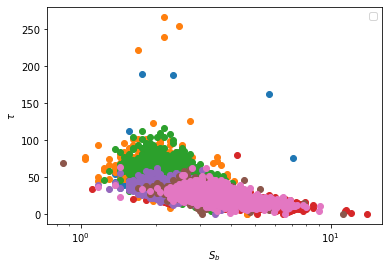

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
files = ["glucose.txt", "glycerol.txt", "sorbitol.txt", "TSB.txt",
         "glucose_6aa.txt", "glucose_12aa.txt", "synthetic_rich.txt"]
#
# Ecoli: Grow -> Divide ("The dream of every cell is to divide")
#        by Mother Machine
# Experimental Properties
#   FOV: Field of View (Microscope)
#   Channel: Growth Channel
# Individual Cell Properties
#   Lambda (l): Elongation rate
#   S_b: Size of Birth (Half on average)
#   S_d: Size of Division (Just before division)
#   tau: Time of division
#
################################################################################
#
# D_t S(t) = l*S => S(t) = S_b e^(l*t), S_d = S_b e^(l*tau)
#
################################################################################
#
# Nutrient Condition:
#   Glucose
#   Glycerol
#   Sorbitol
#
# Model for Cell Division: 
# Model 1 (Wrong):
#   A cell is born w/ size S_b, l (R.V. l_mu), tau (R.V. tau_mu, tau_sugma), =>
#   S_d = S_b exp(l*tau) => S_b = S_d / 2
#
#   S_b & tau are NOT correlated => Cloud of points and Average is a Constant
#
header = ["FOV", "Chn", "L", "tau", "S_b", "S_d", "D"]
fig = plt.figure()
fig.set_facecolor('white')
plt.xlabel(r"$S_b$")
plt.ylabel(r"${\tau}$")
print("<S_b>\tV[S_b]\t<S_d>\tV[S_d]\t<l>\tV[l]\t<tau>\tV[tau]\t<Sd-Sb>\tVar\t<Sd/Sb>\tVar\t<l*tau>\tVar\tFile")
Data = {}
for f in files:
  S = pd.read_csv(f, sep="\t", skiprows=1, names=header, index_col=False)
  Data[f] = {}
  Data[f]["S_b"] = [float(np.average(S.S_b)), float(np.std(S.S_b)),
                    float(np.max(S.S_b)), float(np.min(S.S_b))]
  Data[f]["S_d"] = [float(np.average(S.S_d)), float(np.std(S.S_d)),
                    float(np.max(S.S_d)), float(np.min(S.S_d))]
  Data[f]["L"] = [float(np.average(S.L)), float(np.std(S.L)),
                  float(np.max(S.L)), float(np.min(S.L))]
  Data[f]["tau"] = [float(np.average(S.tau)), float(np.std(S.tau)),
                    float(np.max(S.tau)), float(np.min(S.tau))]
  s = "\t".join(["{:0.2f}\t{:0.2f}".format(a[0], a[1])
                 for a in Data[f].values()]) + "\t"
  print(s,
        "{:0.2f}\t".format(np.average(S.S_d - S.S_b)),
        "{:0.2f}\t".format(np.std(S.S_d - S.S_b)),
        "{:0.2f}\t".format(np.average((S.S_d/S.S_b))),
        "{:0.2f}\t".format(np.std((S.S_d/S.S_b))),
        "{:0.2f}\t".format(np.average((S.L*S.tau))),
        "{:0.2f}\t".format(np.std((S.L*S.tau))),
        f)
  #plt.scatter(S.S_b, S.tau)
  plt.semilogx(S.S_b, S.tau, "o")
  m, b = np.polyfit(S.S_b, S.tau, 1)
  L1 = np.poly1d((m, b))
  #plt.plot(S.S_b, L1(S.S_b), label="{}, {:0.2f}".format(f, m))
plt.legend()
plt.show()


S_b: [ 7.95100019  8.40078144  3.12396239 12.9914849   8.50663564] 7.541305333102988
S_d: [4.98866488 5.07305971 4.99717744 5.07763763 5.04683995] 4.996782129743432
tau: [-14.03069922 -16.42840964  17.45421475 -35.10627783 -16.62072416] -7.7824099061465395
  L: [0.03322211 0.03070173 0.02691448 0.02676011 0.03141164] 0.030067963983275058


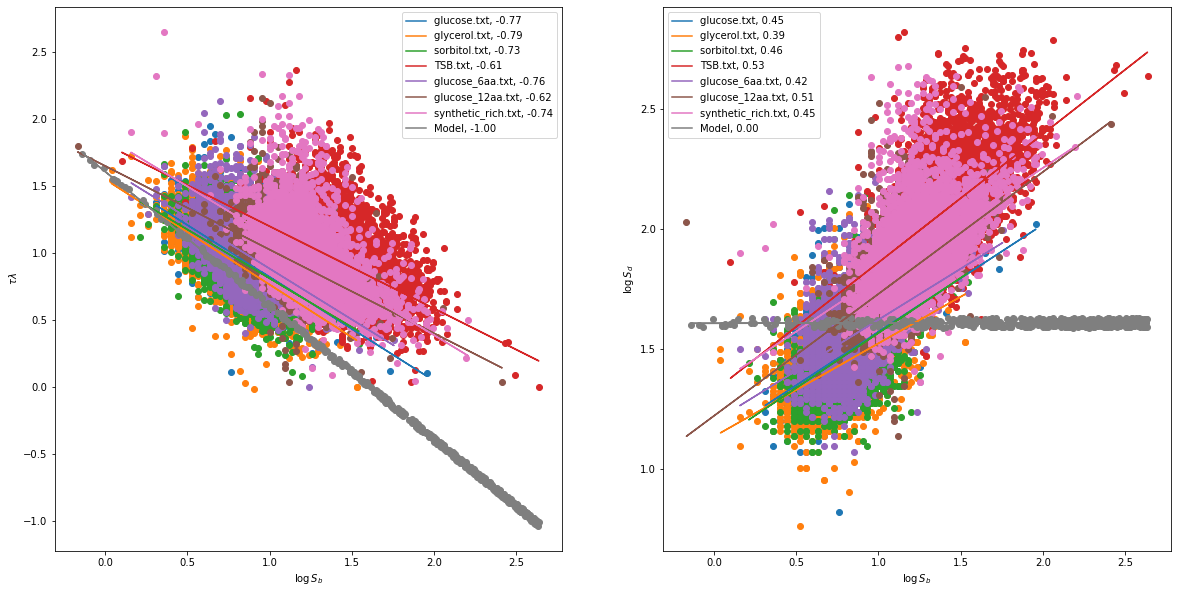

In [11]:
# Model 2
#   S_d = S_b*exp(l*tau) => tau = log(S_d/S_b)/l
# print(js.dumps(Data, indent=2))
N = 500
d = 0.1
S_b = np.random.uniform(np.max([a["S_b"][2] for a in Data.values()]),
                        np.min([a["S_b"][3] for a in Data.values()]), N)
S_d = np.ones(N)*5 + np.random.uniform(-d, d, N)
L = np.ones(N)*0.03 + np.random.uniform(-0.005, 0.005, N)
tau = np.log(S_d/S_b)/L

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.set_facecolor('white')
ax1.set_xlabel(r"$\log S_b$")
ax1.set_ylabel(r"${\tau\lambda}$")
ax2.set_xlabel(r"$\log S_b$")
ax2.set_ylabel(r"${\log S_d}$")
for f in files:
  S = pd.read_csv(f, sep="\t", skiprows=1, names=header, index_col=False)
  ax1.scatter(np.log(S.S_b), S.tau*S.L)
  m, b = np.polyfit(np.log(S.S_b), S.tau*S.L, 1)
  L1 = np.poly1d((m, b))
  ax1.plot(np.log(S.S_b), L1(np.log(S.S_b)), label="{}, {:0.2f}".format(f, m))

  ax2.scatter(np.log(S.S_b), np.log(S.S_d))
  m, b = np.polyfit(np.log(S.S_b), np.log(S.S_d), 1)
  L1 = np.poly1d((m, b))
  ax2.plot(np.log(S.S_b), L1(np.log(S.S_b)), label="{}, {:0.2f}".format(f, m))

# Model
print("S_b:", S_b[:5], np.average(S_b))
print("S_d:", S_d[:5], np.average(S_d))
print("tau:", tau[:5], np.average(tau))
print("  L:", L[:5], np.average(L))
ax1.scatter(np.log(S_b), tau*L)
m, b = np.polyfit(np.log(S_b), tau*L, 1)
L1 = np.poly1d((m, b))
ax1.plot(np.log(S_b), L1(np.log(S_b)), label="Model, {:0.2f}".format(m))

ax2.scatter(np.log(S_b), np.log(S_d))
m, b = np.polyfit(np.log(S_b), np.log(S_d), 1)
L1 = np.poly1d((m, b))
ax2.plot(np.log(S_b), L1(np.log(S_b)), label="Model, {:0.2f}".format(m))

ax1.legend()
ax2.legend()
plt.show()


By looking at the values of the Table 1, we can apreciate a uniform average and variance across Nutrients for the Random Variables (R.V.): $S_d/S_b$ and $\lambda\tau$ with averages 2 and 1, respectively.

Given the diferential equation: $D_t S(t) = \lambda S(t)$, the analytical solution with boundary conditions $S(0) = S_b$ and $S(\tau) = S_d$, expressed as R.V. with average values provided from above, can be expressed as:
$$\log(2)\sim\log\left(\frac{S_d}{S_b}\right) = \lambda\tau \sim 1$$
This discrepancy can be resolved by 2 ways :
1. Add a Constant $C$: $$\log\left(\frac{S_d}{S_b}\right) = \lambda\tau + C \Rightarrow S_d = e^{C}\left(S_b\exp(\lambda\tau)\right)$$
2. Multiply a Constant $C'$: $$\log\left(\frac{S_d}{S_b}\right) = C'\lambda\tau \Rightarrow S_d^{C'} = S_b^{C'}\exp(\lambda\tau) \Rightarrow S_d = S_b\exp(\lambda\tau/C')$$
Resulting in the equality: $C = \left(1 - C'\right)\langle\lambda\tau\rangle/C'$. As the mean of the R.V. are well defined independent to the Nutrient, we are able to approximate analytically the value of $C$ in the following manner.
$$C' = \frac{\langle\lambda\tau\rangle_i}{\log\left(\left\langle\frac{S_d}{S_b}\right\rangle_i\right)} \sim \frac{1}{\log 2} \approx 1.44$$
Recomposing our model, we obtain:
$$S_d \approx S_b\exp(\lambda\tau + 1.7) \approx S_b\exp(1.44\lambda\tau)$$

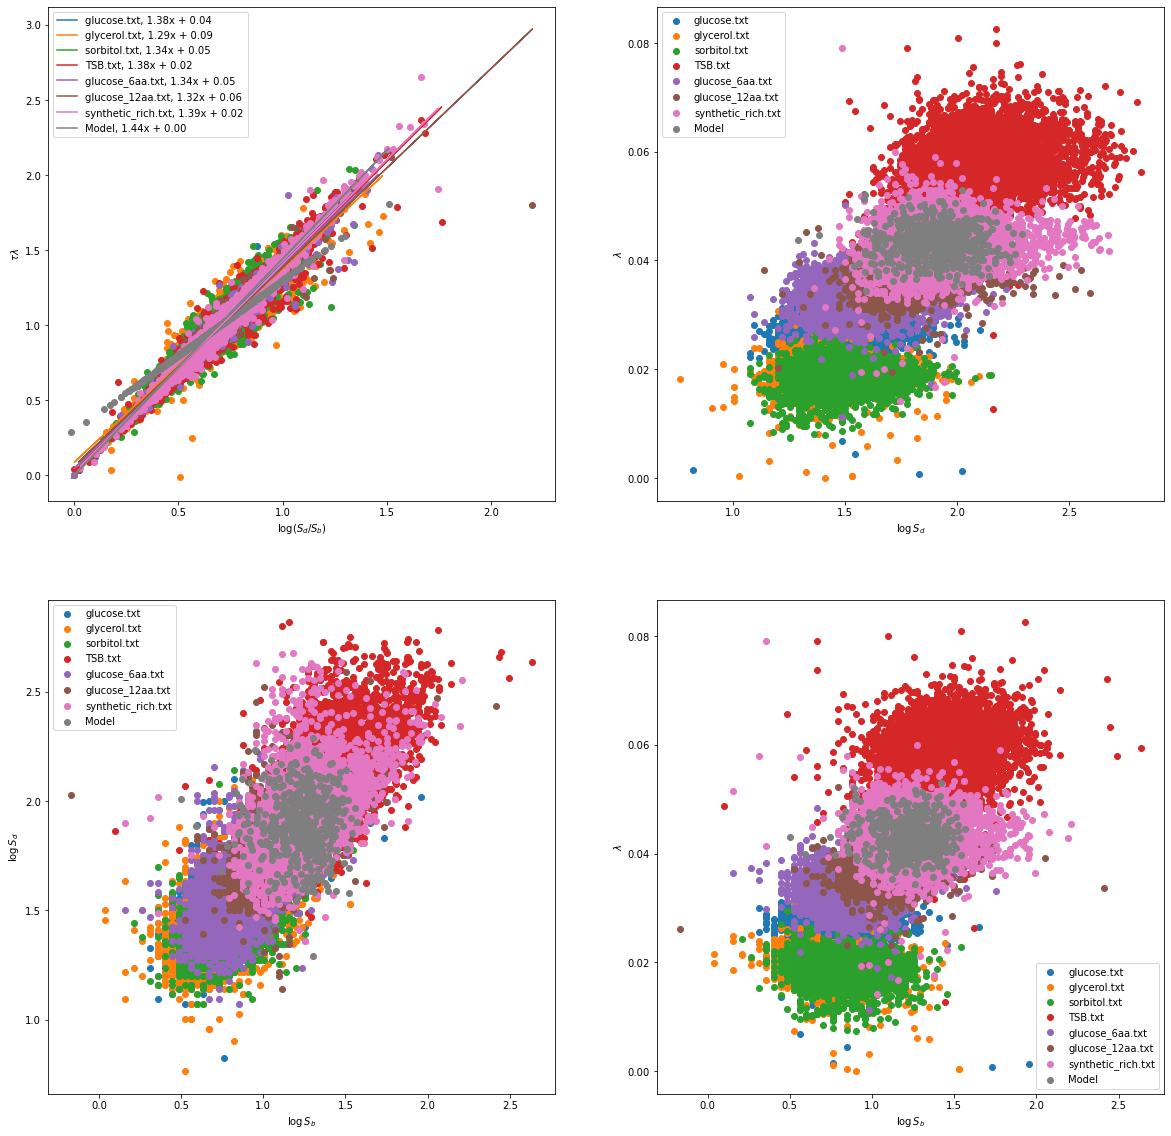

In [87]:
# Model 2
#   S_d = S_b*exp(l*tau)
#   S_d = 2*S_b
#   => 2 = exp(l*tau) => tau = log(2)/l
#
N = 500
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
fig.set_facecolor('white')
for i, f in enumerate(files):
  S = pd.read_csv(f, sep="\t", skiprows=1, names=header, index_col=False)

  ax[0, 0].scatter(np.log(S.S_d/S.S_b), S.tau*S.L)
  m, b = np.polyfit(np.log(S.S_d/S.S_b), S.tau*S.L, 1)
  L1 = np.poly1d((m, b))
  ax[0, 0].plot(np.log(S.S_d/S.S_b), L1(np.log(S.S_d/S.S_b)), label="{}, {:0.2f}x + {:0.2f}".format(f, m, b))
  ax[0, 1].scatter(np.log(S.S_d), S.L, label=f"{f}")
  ax[1, 0].scatter(np.log(S.S_b), np.log(S.S_d), label=f"{f}")
  ax[1, 1].scatter(np.log(S.S_b), S.L, label=f"{f}")

# Model
S_b = np.random.normal(Data[f]["S_b"][0], Data[f]["S_b"][1], N)
S_d = np.random.normal(Data[f]["S_d"][0], Data[f]["S_d"][1], N)
L = np.random.normal(Data[f]["L"][0], Data[f]["L"][1], N)
tau = np.log(S_d/S_b)/L
ax[0, 0].scatter(np.log(S_d/S_b), tau*L/np.log(2))
m, b = np.polyfit(np.log(S_d/S_b), tau*L/np.log(2), 1)
L1 = np.poly1d((m, b))
ax[0, 0].plot(np.log(S_d/S_b), L1(np.log(S_d/S_b)), label="Model, {:0.2f}x + {:0.2f}".format(m, b))
ax[0, 0].legend()
ax[0, 0].set_xlabel(r"$\log (S_d/S_b)$")
ax[0, 0].set_ylabel(r"${\tau\lambda}$")

ax[0, 1].scatter(np.log(S_d), L, label="Model")
ax[0, 1].legend()+ 0.7
ax[0, 1].set_xlabel(r"$\log S_d$")
ax[0, 1].set_ylabel(r"${\lambda}$")

ax[1, 0].scatter(np.log(S_b), np.log(S_d), label="Model")
ax[1, 0].legend()
ax[1, 0].set_xlabel(r"$\log S_b$")
ax[1, 0].set_ylabel(r"${\log S_d}$")

ax[1, 1].scatter(np.log(S_b), L, label="Model")
ax[1, 1].legend()
ax[1, 1].set_xlabel(r"$\log S_b$")
ax[1, 1].set_ylabel(r"${\lambda}$")
plt.show()